<a href="https://colab.research.google.com/github/ambika1us/Screen-time-analysis-/blob/main/Analyzing_Screen_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

In [11]:
data=pd.read_csv('/content/drive/MyDrive/Analyzing_Screen_Time/screentime_analysis.csv')

In [12]:
data.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [13]:
data.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [16]:
data['Date']=pd.to_datetime(data['Date'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             200 non-null    datetime64[ns]
 1   App              200 non-null    object        
 2   Usage (minutes)  200 non-null    int64         
 3   Notifications    200 non-null    int64         
 4   Times Opened     200 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.9+ KB


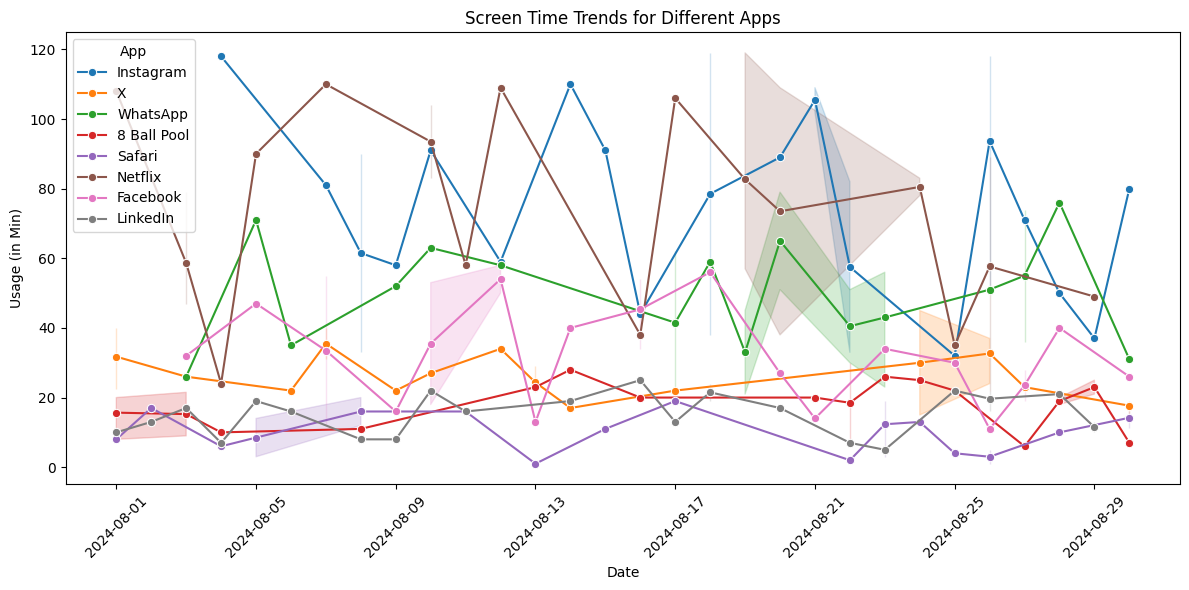

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Usage (minutes)',hue='App',data=data,marker='o')
plt.title('Screen Time Trends for Different Apps')
plt.ylabel('Usage (in Min)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

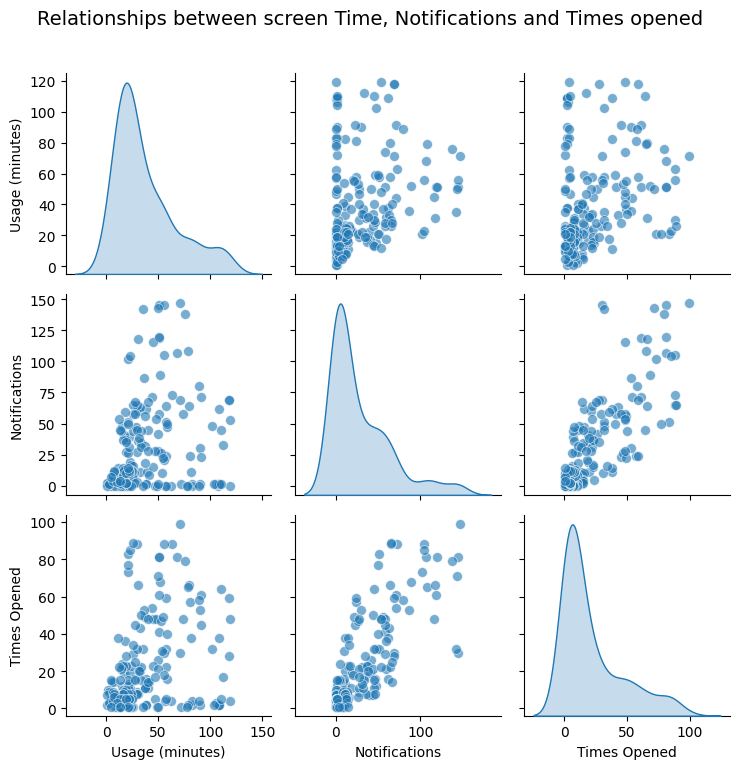

In [23]:
plt.figure(figsize=(8,6))
pairplot=sns.pairplot(
    data[['Usage (minutes)','Notifications','Times Opened']],
    kind='scatter',
    diag_kind='kde',
    plot_kws={'alpha':0.6,'s':50}
)

pairplot.fig.suptitle('Relationships between screen Time, Notifications and Times opened',y=1.02,fontsize=14)
plt.tight_layout()
plt.show()

In [25]:
app_analysis=data.groupby('App').agg(
    avg_usage=('Usage (minutes)','mean'),
    avg_notifications=('Notifications','mean'),
    avg_times_opened=('Times Opened','mean')
).reset_index()

app_analysis=app_analysis.sort_values(by='avg_usage', ascending=False)
app_analysis

,App,avg_usage,avg_notifications,avg_times_opened
2,Instagram,75.92,49.80,41.56
4,Netflix,72.76,0.44,2.56
6,WhatsApp,48.16,99.92,68.24
1,Facebook,33.68,39.72,30.20
7,X,27.00,25.84,13.16
0,8 Ball Pool,18.08,4.52,7.28
3,LinkedIn,15.60,8.92,4.76
5,Safari,10.80,0.72,5.28
